something here


## Reproducing plots from Project Description

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# for 1000 Monte Carlo steps, lattice side length 20, reduced T = 0.65
# data structure is [MCsteps, Ratio, Energy, Order]
baseline_data = np.loadtxt('LL-Outputs/LL-Output-Baseline.txt')
MCsteps = baseline_data[:,0]

In [17]:
baseline_data

array([[ 0.0000000e+00,  5.0000000e-01, -3.9883320e+02,  2.6850000e-01],
       [ 1.0000000e+00,  7.0500000e-01, -6.0241640e+02,  3.3070000e-01],
       [ 2.0000000e+00,  5.9500000e-01, -7.4387570e+02,  3.0760000e-01],
       ...,
       [ 9.9800000e+02,  4.2250000e-01, -1.2593601e+03,  7.5380000e-01],
       [ 9.9900000e+02,  3.8000000e-01, -1.2492319e+03,  7.5320000e-01],
       [ 1.0000000e+03,  4.3750000e-01, -1.2789787e+03,  7.5680000e-01]])

Monte Carlo step versus reduced energy, and Monte Carlo steps versus Order S for reduced T = 0.65

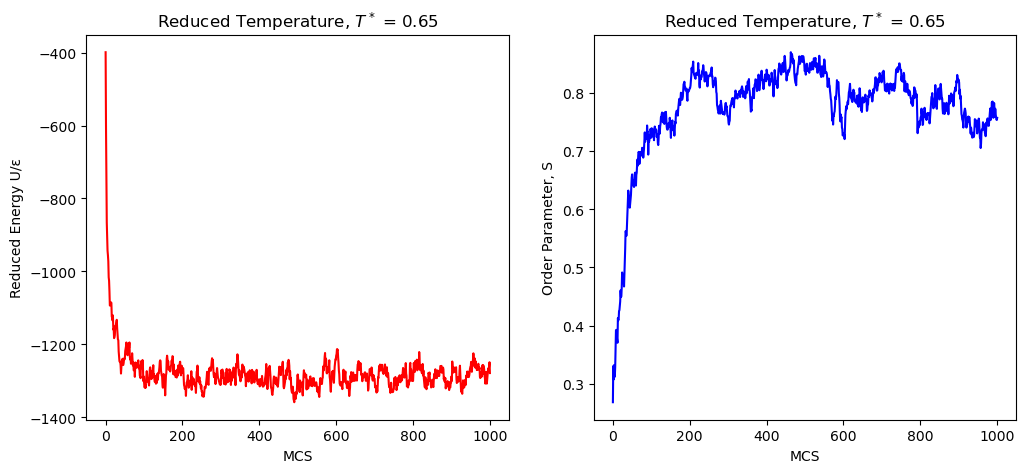

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(baseline_data[:,0], baseline_data[:,2], color='red')

ax[0].set_xlabel('MCS')
ax[0].set_ylabel('Reduced Energy U/ε')
ax[0].set_title('Reduced Temperature, $T^*$ = 0.65')

ax[1].plot(baseline_data[:,0], baseline_data[:,3], color='blue')

ax[1].set_xlabel('MCS')
ax[1].set_ylabel('Order Parameter, S')
ax[1].set_title('Reduced Temperature, $T^*$ = 0.65')
plt.show()

In [19]:
reduced_t = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]
avg_S = []
std_S = []
for i in reduced_t:
    data = np.loadtxt(f'LL-Outputs/LL-Output-{i}.txt')
    
    order = data[:,3]
    
    eq_S = order[len(order)//2:].mean()
    std = order[len(order)//2:].std()

    avg_S.append(eq_S)
    std_S.append(std)

    

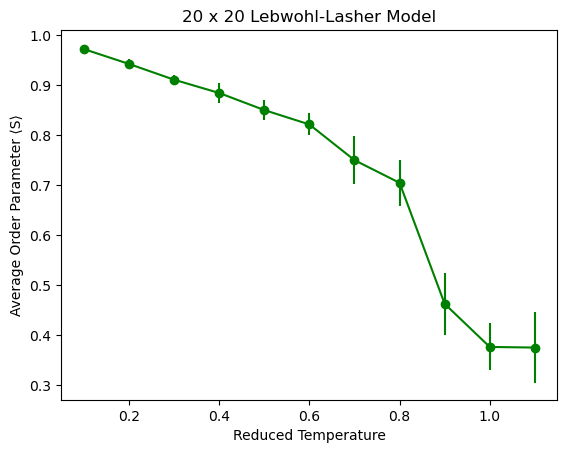

In [20]:
fig, ax = plt.subplots()

ax.errorbar(x=reduced_t, y=avg_S, yerr=std_S, marker='o', color='green')
ax.set_xlabel('Reduced Temperature')
ax.set_ylabel('Average Order Parameter ⟨S⟩')
ax.set_title('20 x 20 Lebwohl-Lasher Model')
plt.show()

Plotting baseline against numba accelerated version

In [21]:
# reading in numba accelerated version
numba = np.loadtxt('LL-Output-Fri-13-Feb-2026-at-03-49-08PM.txt')

FileNotFoundError: LL-Output-Fri-13-Feb-2026-at-03-49-08PM.txt not found.

NameError: name 'numba' is not defined

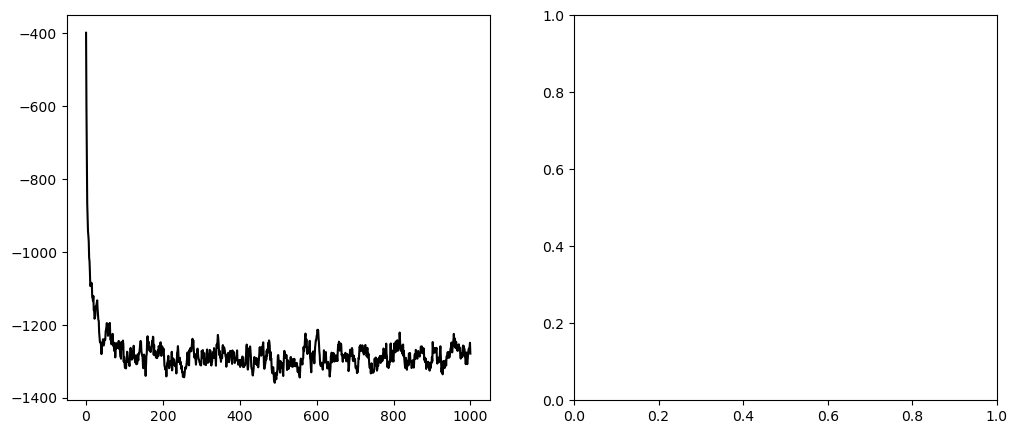

In [22]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(baseline_data[:,0], baseline_data[:,2], color='black')
ax[0].plot(numba[:,0], numba[:,2], color='red')


ax[0].set_xlabel('MCS')
ax[0].set_ylabel('Reduced Energy U/ε')
ax[0].set_title('Reduced Temperature, $T^*$ = 0.65')

ax[1].plot(baseline_data[:,0], baseline_data[:,3], color='black')
ax[1].plot(numba[:,0], numba[:,3], color='red')

ax[1].set_xlabel('MCS')
ax[1].set_ylabel('Order Parameter, S')
ax[1].set_title('Reduced Temperature, $T^*$ = 0.65')
plt.show()

plotting baseline against vectorised all_energy 

In [23]:

v_all_e = np.loadtxt('LL-Output-Sat-14-Feb-2026-at-06-11-15PM.txt')

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(baseline_data[:,0], baseline_data[:,2], color='black')
ax[0].plot(v_all_e[:,0], v_all_e[:,2], color='red')


ax[0].set_xlabel('MCS')
ax[0].set_ylabel('Reduced Energy U/ε')
ax[0].set_title('Reduced Temperature, $T^*$ = 0.65')

ax[1].plot(baseline_data[:,0], baseline_data[:,3], color='black')
ax[1].plot(v_all_e[:,0], v_all_e[:,3], color='red')

ax[1].set_xlabel('MCS')
ax[1].set_ylabel('Order Parameter, S')
ax[1].set_title('Reduced Temperature, $T^*$ = 0.65')
plt.show()

FileNotFoundError: LL-Output-Sat-14-Feb-2026-at-06-11-15PM.txt not found.

Using vectorisation on how the neighbouring coordinates are calculating changes how the order parameter is calculated at each MC timestep?

In [24]:
cythonised = np.loadtxt('LL-Output-Sun-15-Feb-2026-at-03-35-31PM.txt')

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(baseline_data[:,0], baseline_data[:,2], color='black')
ax[0].plot(v_all_e[:,0], v_all_e[:,2], color='blue')


ax[0].set_xlabel('MCS')
ax[0].set_ylabel('Reduced Energy U/ε')
ax[0].set_title('Reduced Temperature, $T^*$ = 0.65')

ax[1].plot(baseline_data[:,0], baseline_data[:,3], color='black')
ax[1].plot(v_all_e[:,0], v_all_e[:,3], color='blue')

ax[1].set_xlabel('MCS')
ax[1].set_ylabel('Order Parameter, S')
ax[1].set_title('Reduced Temperature, $T^*$ = 0.65')
plt.show()

FileNotFoundError: LL-Output-Sun-15-Feb-2026-at-03-35-31PM.txt not found.

# 

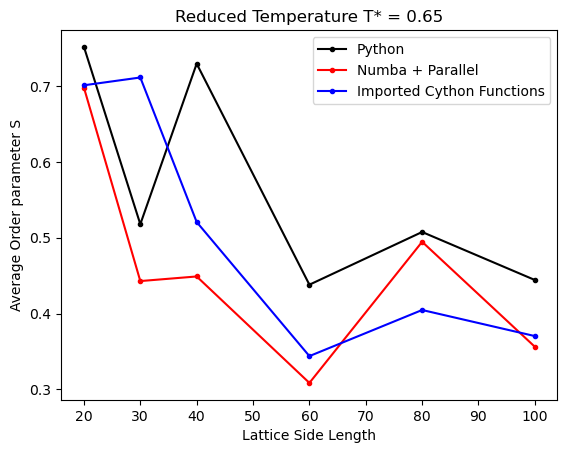

In [123]:
# at one temperature, 0.65 
# x axis lattice size 
lattice_lengths = [20, 30, 40, 60, 80 ,100] 
# y axis average order parameter

avg_baseline_order = []
# collecting average order for baseline runs 
for i in lattice_lengths:
    data = np.loadtxt(f'scaling/{i}_0.65.txt')
    avg_baseline_order.append(data[:,3].mean())


avg_numba_p_order = []
# collecting average order for baseline runs 
for i in lattice_lengths:
    data = np.loadtxt(f'scaling/numba_p_{i}_0.65.txt')
    avg_numba_p_order.append(data[:,3].mean())

avg_imp_c_order = []
# collecting average order for baseline runs 
for i in lattice_lengths:
    data = np.loadtxt(f'scaling/imported_cython_{i}_0.65.txt')
    avg_imp_c_order.append(data[:,3].mean())


fig, ax = plt.subplots()
ax.plot(lattice_lengths, avg_baseline_order, color='black', marker='.', label='Python')
ax.plot(lattice_lengths, avg_numba_p_order, color='red', marker='.', label='Numba + Parallel')
ax.plot(lattice_lengths, avg_imp_c_order, color='blue', marker='.', label='Imported Cython Functions')
ax.set_xlabel('Lattice Side Length')
ax.set_ylabel('Average Order parameter S')
ax.set_title('Reduced Temperature T* = 0.65')

ax.legend()
plt.show()

In [109]:
avg_baseline_order

[np.float64(0.7520669330669331),
 np.float64(0.5179389610389611),
 np.float64(0.7299117882117884),
 np.float64(0.4380504495504495),
 np.float64(0.5076435564435564),
 np.float64(0.4442614385614385)]

In [110]:
avg_numba_p_order

[np.float64(0.6982236763236763),
 np.float64(0.4428432567432567),
 np.float64(0.44892467532467534),
 np.float64(0.30832787212787216),
 np.float64(0.4946973026973027),
 np.float64(0.35607532467532466)]

In [10]:
def extract_size_and_time(filename):
    size = None
    runtime = None

    with open(filename, "r") as f:
        for line in f:
            if line.startswith("# Size of lattice"):
                size = int(line.split()[-1].split("x")[0])
            elif line.startswith("# Run time"):
                runtime = float(line.split()[-1])

    if size is None or runtime is None:
        raise ValueError("Missing size or runtime")

    return size, runtime


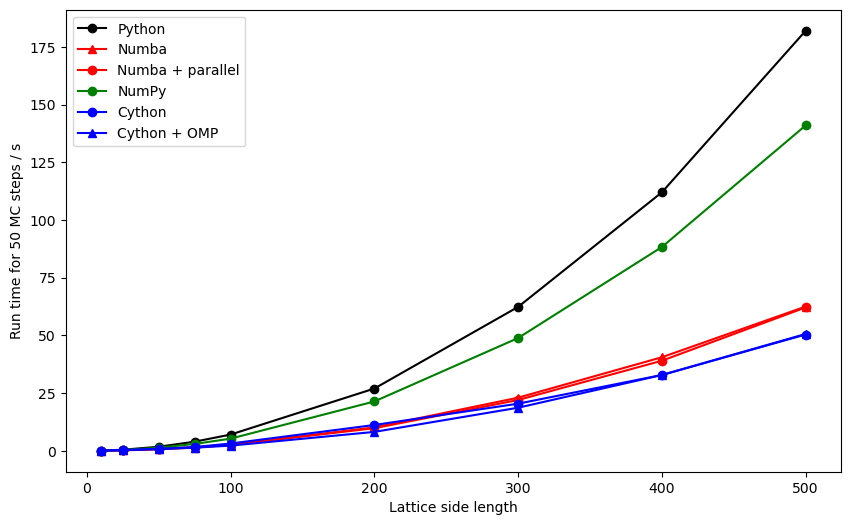

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))

## ============================== plotting baseline timings =================================## 
base_files = [
    "timings/scalings/baseline_10.txt",
    "timings/scalings/baseline_25.txt",
    "timings/scalings/baseline_50.txt",
    "timings/scalings/baseline_75.txt",
    "timings/scalings/baseline_100.txt",
    "timings/scalings/baseline_200.txt",
    "timings/scalings/baseline_300.txt",
    "timings/scalings/baseline_400.txt",
    "timings/scalings/baseline_500.txt",
    
]

sizes = []
base_times = []

for f in base_files:
    L, t = extract_size_and_time(f)
    sizes.append(L)
    base_times.append(t)
## ============================== plotting numba timings =================================## 
numba_files = [
    "timings/scalings/numba_10.txt",
    "timings/scalings/numba_25.txt",
    "timings/scalings/numba_50.txt",
    "timings/scalings/numba_75.txt",
    "timings/scalings/numba_100.txt",
    "timings/scalings/numba_200.txt",
    "timings/scalings/numba_300.txt",
    "timings/scalings/numba_400.txt",
    "timings/scalings/numba_500.txt",
    
]

sizes = []
numba_times = []

for f in numba_files:
    L, t = extract_size_and_time(f)
    sizes.append(L)
    numba_times.append(t)


## ============================== plotting Numba + parallel timings =================================## 
numba_p_files = [
    "timings/scalings/numba_p_10.txt",
    "timings/scalings/numba_p_25.txt",
    "timings/scalings/numba_p_50.txt",
    "timings/scalings/numba_p_75.txt",
    "timings/scalings/numba_p_100.txt",
    "timings/scalings/numba_p_200.txt",
    "timings/scalings/numba_p_300.txt",
    "timings/scalings/numba_p_400.txt",
    "timings/scalings/numba_p_500.txt",
]

sizes = []
numba_p_times = []

for f in numba_p_files:
    L, t = extract_size_and_time(f)
    sizes.append(L)
    numba_p_times.append(t)

## ============================== plotting numpy timings =================================## 
numpy_files = [
    "timings/scalings/numpy_10.txt",
    "timings/scalings/numpy_25.txt",
    "timings/scalings/numpy_50.txt",
    "timings/scalings/numpy_75.txt",
    "timings/scalings/numpy_100.txt",
    "timings/scalings/numpy_200.txt",
    "timings/scalings/numpy_300.txt",
    "timings/scalings/numpy_400.txt",
    "timings/scalings/numpy_500.txt",
    
]

sizes = []
numpy_times = []

for f in numpy_files:
    L, t = extract_size_and_time(f)
    sizes.append(L)
    numpy_times.append(t)
## ============================== plotting cython =================================## 

c_files = [
    "timings/scalings/c_10.txt",
    "timings/scalings/c_25.txt",
    "timings/scalings/c_50.txt",
    "timings/scalings/c_75.txt",
    "timings/scalings/c_100.txt",
    "timings/scalings/c_200.txt",
    "timings/scalings/c_300.txt",
    "timings/scalings/c_400.txt",
    "timings/scalings/c_500.txt",
]

sizes = []
c_times = []

for f in c_files:
    L, t = extract_size_and_time(f)
    sizes.append(L)
    c_times.append(t)

## ============================== plotting cython + omp =================================## 

c_omp_files = [
    "timings/scalings/c_omp_10.txt",
    "timings/scalings/c_omp_25.txt",
    "timings/scalings/c_omp_50.txt",
    "timings/scalings/c_omp_75.txt",
    "timings/scalings/c_omp_100.txt",
    "timings/scalings/c_omp_200.txt",
    "timings/scalings/c_omp_300.txt",
    "timings/scalings/c_omp_400.txt",
    "timings/scalings/c_omp_500.txt",
]

sizes = []
c_omp_times = []

for f in c_omp_files:
    L, t = extract_size_and_time(f)
    sizes.append(L)
    c_omp_times.append(t)


ax.plot(sizes, base_times, marker="o", color='black', label='Python')
ax.plot(sizes, numba_times, marker="^", color='red', label='Numba')
ax.plot(sizes, numba_p_times, marker="o", color='red', label='Numba + parallel')
ax.plot(sizes, numpy_times, marker="o", color='green', label='NumPy')
ax.plot(sizes, c_times, marker="o", color='blue', label='Cython')
ax.plot(sizes, c_omp_times, marker="^", color='blue', label='Cython + OMP')

ax.set_xlabel("Lattice side length")
ax.set_ylabel("Run time for 50 MC steps / s")

ax.legend()
plt.show()


In [ ]:
# plotting time scalings

scaling_size = [10, 25, 50, 75, 100, 200, 300, 400, 500]

# checking cython omp vs normal


In [7]:
import numpy as np
import matplotlib.pyplot as plt

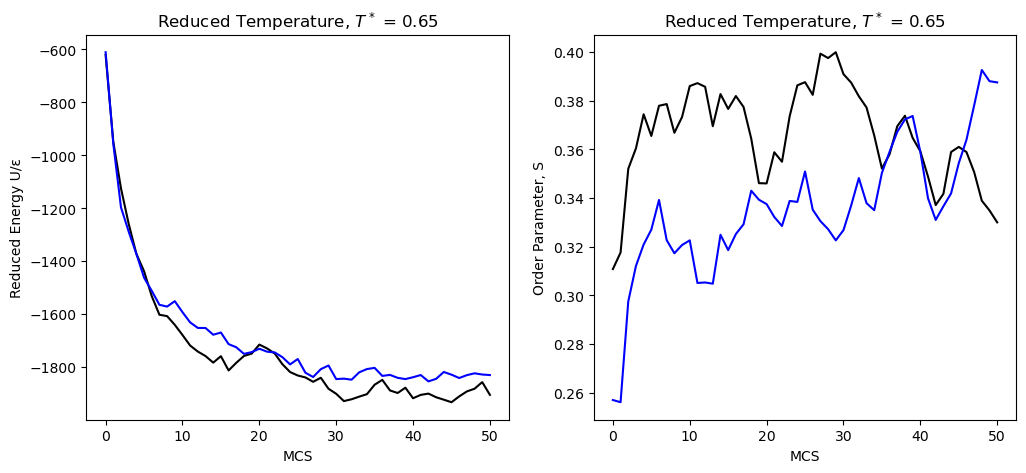

In [8]:
cython = np.loadtxt("timings\scalings\c_omp_25.txt")
cython_omp = np.loadtxt('cython\LL-Output-Tue-24-Feb-2026-at-12-04-10AM.txt')



fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(cython[:,0], cython[:,2], color='black')
ax[0].plot(cython_omp[:,0], cython_omp[:,2], color='blue')


ax[0].set_xlabel('MCS')
ax[0].set_ylabel('Reduced Energy U/ε')
ax[0].set_title('Reduced Temperature, $T^*$ = 0.65')

ax[1].plot(cython[:,0], cython[:,3], color='black')
ax[1].plot(cython_omp[:,0], cython_omp[:,3], color='blue')

ax[1].set_xlabel('MCS')
ax[1].set_ylabel('Order Parameter, S')
ax[1].set_title('Reduced Temperature, $T^*$ = 0.65')
plt.show()
